In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px


df = pd.read_csv("athlete_events.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [2]:
# a) hur många länder som är med i datan?
print(df["Team"].unique())
print(df["Team"].nunique())

['China' 'Denmark' 'Denmark/Sweden' ... 'Solos Carex' 'Dow Jones' 'Digby']
1184


In [3]:
# b) vilka länder är med? (förkortningarna räcker)
print(df["NOC"].unique())
print(df["NOC"].nunique())

['CHN' 'DEN' 'NED' 'USA' 'FIN' 'NOR' 'ROU' 'EST' 'FRA' 'MAR' 'ESP' 'EGY'
 'IRI' 'BUL' 'ITA' 'CHA' 'AZE' 'SUD' 'RUS' 'ARG' 'CUB' 'BLR' 'GRE' 'CMR'
 'TUR' 'CHI' 'MEX' 'URS' 'NCA' 'HUN' 'NGR' 'ALG' 'KUW' 'BRN' 'PAK' 'IRQ'
 'UAR' 'LIB' 'QAT' 'MAS' 'GER' 'CAN' 'IRL' 'AUS' 'RSA' 'ERI' 'TAN' 'JOR'
 'TUN' 'LBA' 'BEL' 'DJI' 'PLE' 'COM' 'KAZ' 'BRU' 'IND' 'KSA' 'SYR' 'MDV'
 'ETH' 'UAE' 'YAR' 'INA' 'PHI' 'SGP' 'UZB' 'KGZ' 'TJK' 'EUN' 'JPN' 'CGO'
 'SUI' 'BRA' 'FRG' 'GDR' 'MON' 'ISR' 'URU' 'SWE' 'ISV' 'SRI' 'ARM' 'CIV'
 'KEN' 'BEN' 'UKR' 'GBR' 'GHA' 'SOM' 'LAT' 'NIG' 'MLI' 'AFG' 'POL' 'CRC'
 'PAN' 'GEO' 'SLO' 'CRO' 'GUY' 'NZL' 'POR' 'PAR' 'ANG' 'VEN' 'COL' 'BAN'
 'PER' 'ESA' 'PUR' 'UGA' 'HON' 'ECU' 'TKM' 'MRI' 'SEY' 'TCH' 'LUX' 'MTN'
 'CZE' 'SKN' 'TTO' 'DOM' 'VIN' 'JAM' 'LBR' 'SUR' 'NEP' 'MGL' 'AUT' 'PLW'
 'LTU' 'TOG' 'NAM' 'AHO' 'ISL' 'ASA' 'SAM' 'RWA' 'DMA' 'HAI' 'MLT' 'CYP'
 'GUI' 'BIZ' 'YMD' 'KOR' 'THA' 'BER' 'ANZ' 'SCG' 'SLE' 'PNG' 'YEM' 'IOA'
 'OMA' 'FIJ' 'VAN' 'MDA' 'YUG' 'BAH' 'GUA' 'SRB' 'I

In [4]:
# c) vilka sporter är med?
print(df["Sport"].unique())
print(df["Sport"].nunique())

['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Art Competitions' 'Alpine Skiing'
 'Handball' 'Weightlifting' 'Wrestling' 'Luge' 'Water Polo' 'Hockey'
 'Rowing' 'Bobsleigh' 'Fencing' 'Equestrianism' 'Shooting' 'Boxing'
 'Taekwondo' 'Cycling' 'Diving' 'Canoeing' 'Tennis' 'Modern Pentathlon'
 'Figure Skating' 'Golf' 'Softball' 'Archery' 'Volleyball'
 'Synchronized Swimming' 'Table Tennis' 'Nordic Combined' 'Baseball'
 'Rhythmic Gymnastics' 'Freestyle Skiing' 'Rugby Sevens' 'Trampolining'
 'Beach Volleyball' 'Triathlon' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Rugby' 'Short Track Speed Skating' 'Skeleton' 'Lacrosse' 'Polo'
 'Cricket' 'Racquets' 'Motorboating' 'Military Ski Patrol' 'Croquet'
 'Jeu De Paume' 'Roque' 'Alpinism' 'Basque Pelota' 'Aeronautics']
66


In [5]:
# d) vilka medaljtyper finns det?

print(df["Medal"].dropna().unique())


['Gold' 'Bronze' 'Silver']


In [6]:
# e) ta reda på statistik för åldern: medelvärde, median, min, max, standardavvikelse,
df["Age"].describe()

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

In [7]:
# g) Not all sports have both genders competing. 
print(df["Sport"].value_counts().nunique())
sport_gender_count = df.groupby("Sport")["Sex"].nunique()
print(sport_gender_count)


fig = px.histogram(df, x= "Sport", color="Sex", barmode="group")
fig.show()


65
Sport
Aeronautics         1
Alpine Skiing       2
Alpinism            2
Archery             2
Art Competitions    2
                   ..
Tug-Of-War          1
Volleyball          2
Water Polo          2
Weightlifting       2
Wrestling           2
Name: Sex, Length: 66, dtype: int64


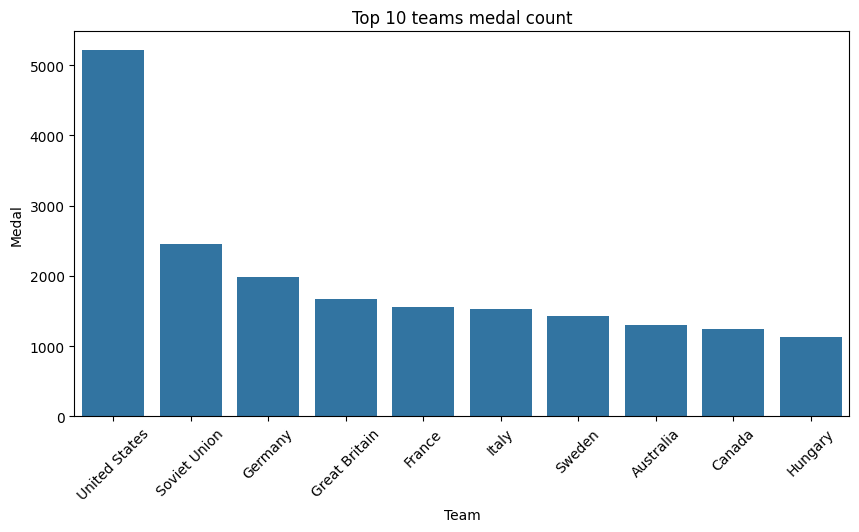

In [8]:
# h) diagram över topp 10 länder som tagit flest medaljer

df_medals = df.dropna(subset="Medal")
team_df_medals = df_medals.groupby("Team")["Medal"].count().sort_values(ascending=False).head(10)


plt.figure(figsize=(10,5))
sns.barplot(team_df_medals)
plt.title("Top 10 teams medal count")
plt.xticks(rotation=45)
plt.show()




